In [16]:
# Default locations if parameter not passed
benchmark_data_path = "./bench_metadata.pkl"
output_folder = "./output-paper"

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from rich import print as rprint
import seaborn as sns
import os
from scipy.stats import bootstrap

benchmark_data = pickle.load(open(benchmark_data_path, "rb"))

metadata = benchmark_data["metadata"]
df = pd.DataFrame(benchmark_data["dataframe"])

# create the output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


# we are not plotting against sif paths
df.drop(columns=["sif_path"], inplace=True)


# df.drop(columns=["sif_path", "steps", "iter"], inplace=True)
df = df.loc[:,~df.columns.duplicated()].copy()
rprint(df.columns)
rprint(df.head())
rprint(df.tail())


df.to_csv(f"{output_folder}/data.csv")

Index(['name', 'steps', 'type', 'iter', 'nodes', 'output', 'time'], dtype='object')

name  steps type       iter  nodes  \
0  main     32  fft  100000000     28   
1  main     32  fft  100000000     28   
2  main     32  fft  100000000     28   
3  main     32  fft  100000000     28   
4  main     32  fft  100000000     28   

                                              output       time  
0  Scheduling : 18925\nElapsed Time 3.472627e+01 ...  39.950348  
1  Scheduling : 19370\nElapsed Time 3.437901e+01 ...  35.838244  
2  Scheduling : 18992\nElapsed Time 3.412727e+01 ...  35.145242  
3  Scheduling : 19321\nElapsed Time 3.388594e+01 ...  34.945644  
4  Scheduling : 19018\nElapsed Time 3.423881e+01 ...  35.308201

name  steps        type  iter  nodes  \
3775  multiqueue     32  stencil_1d  1000      3   
3776  multiqueue     32  stencil_1d  1000      3   
3777  multiqueue     32  stencil_1d  1000      3   
3778  multiqueue     32  stencil_1d  1000      3   
3779  multiqueue     32  stencil_1d  1000      3   

                                                 output      time  
3775  Scheduling : 19\nScheduling : 4018\nElapsed Ti...  2.764963  
3776  Scheduling : 11\nScheduling : 4101\nElapsed Ti...  2.716840  
3777  Scheduling : 12\nScheduling : 4113\nElapsed Ti...  2.740009  
3778  Scheduling : 18\nScheduling : 4016\nElapsed Ti...  2.704977  
3779  Scheduling : 11\nScheduling : 4060\nElapsed Ti...  2.709837

In [18]:
sns.set_theme()

# colors = [
#     "#7f7f7f",  # grey
#     "#621dac",  # main purple
#     "#c5702d",  # orange
#     "#000000",  # black,
#     "#099892",  # teal
#     "#ffd400",  # yellow
#     "#7e57c4",  # pink/purple,
# ]
# colors_backup = colors.copy()

In [19]:
def calculate_bootstrap_error(data):
    if metadata["runs"] < 2:
        return 0
    res = bootstrap(
        (data,), np.mean, confidence_level=0.95, n_resamples=1000, method="basic"
    )
    return res.standard_error

In [20]:

def get_numerical_schedule(input_string):
  # Replace the literal '\n' with actual newlines
  input_string = input_string.replace(r"\n", "\n")

  # Split the input string into lines
  lines = input_string.strip().splitlines()
  # Initialize a total sum for Scheduling values
  total_scheduling = 0.0

  # Iterate over the lines to find those starting with 'Scheduling'
  for line in lines:
      if line.startswith("Scheduling :"):
          # Extract the number after 'Scheduling :' and add to total
          _, value = line.split(":")
          total_scheduling += float(value.strip())

  return total_scheduling

libomp speedup: 1.0011939196823407
tasksharing speedup: 1.0878994277483163
multiqueue speedup: 1.2747421464564055




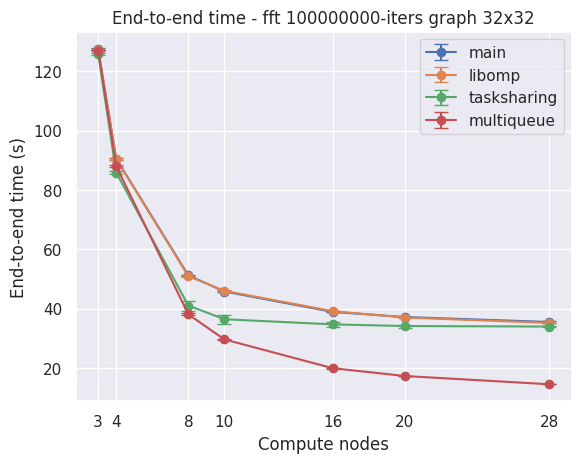

libomp speedup: 0.983058921034167
tasksharing speedup: 1.0376007966765315
multiqueue speedup: 1.3455124587363556




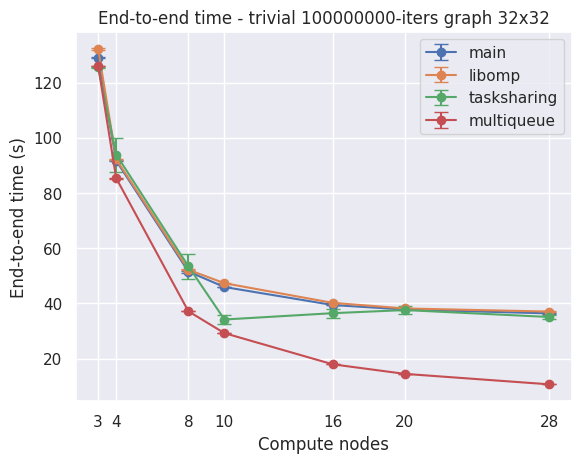

libomp speedup: 0.9946019221017683
tasksharing speedup: 1.1111253563815793
multiqueue speedup: 1.2881865652624362




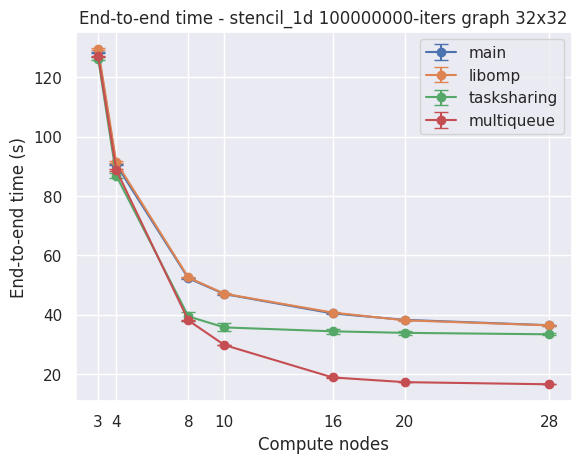

libomp speedup: 1.004226102115893
tasksharing speedup: 1.0120549775272285
multiqueue speedup: 0.87225257502149




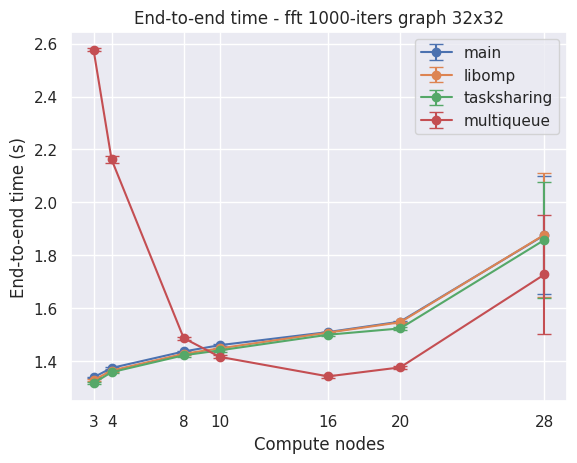

libomp speedup: 1.0042806274502407
tasksharing speedup: 1.011172222052102
multiqueue speedup: 0.9302116807811638




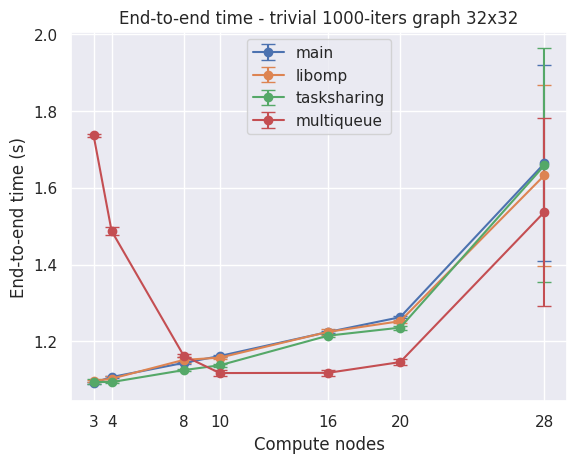

libomp speedup: 1.0294601072097487
tasksharing speedup: 1.042679853246302
multiqueue speedup: 0.8876054952668352




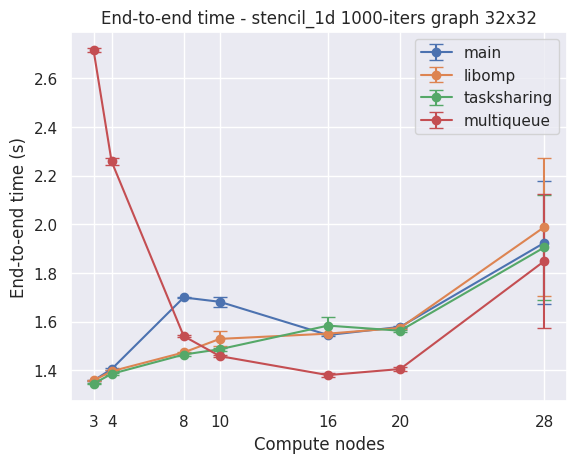

libomp speedup: 1.2571034791030322
tasksharing speedup: 1.1838791411670138
multiqueue speedup: 1.268142245641384




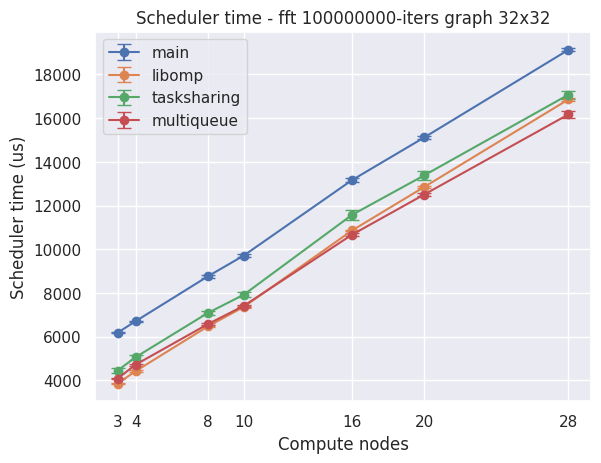

libomp speedup: 1.3437930867661643
tasksharing speedup: 1.2448426825613346
multiqueue speedup: 1.3584941418130574




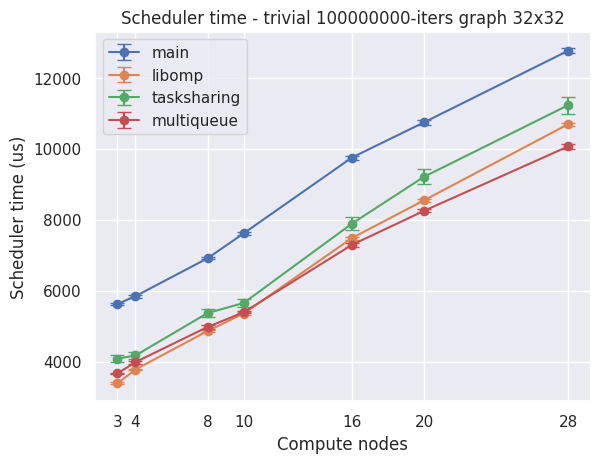

libomp speedup: 1.2373488375404698
tasksharing speedup: 1.1894353761584147
multiqueue speedup: 1.2539942540880606




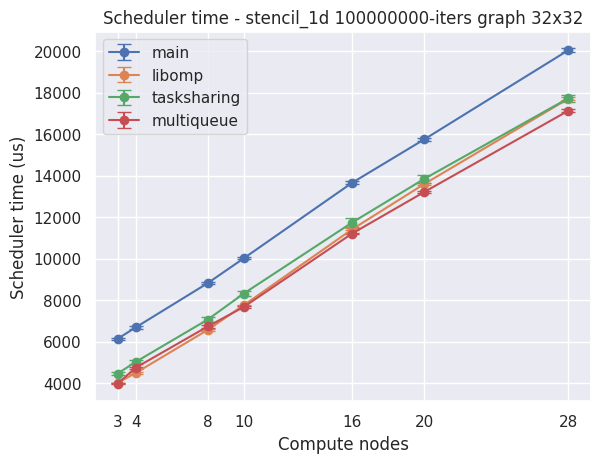

libomp speedup: 1.2677084183990013
tasksharing speedup: 1.2103511404622602
multiqueue speedup: 1.2695948371637538




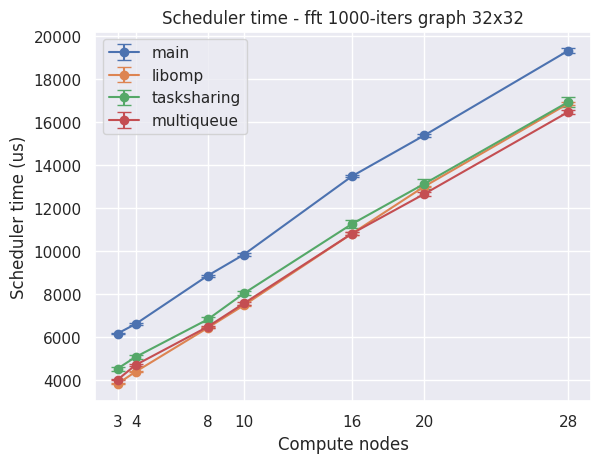

libomp speedup: 1.3344533842392978
tasksharing speedup: 1.271623840968967
multiqueue speedup: 1.3768215937874797




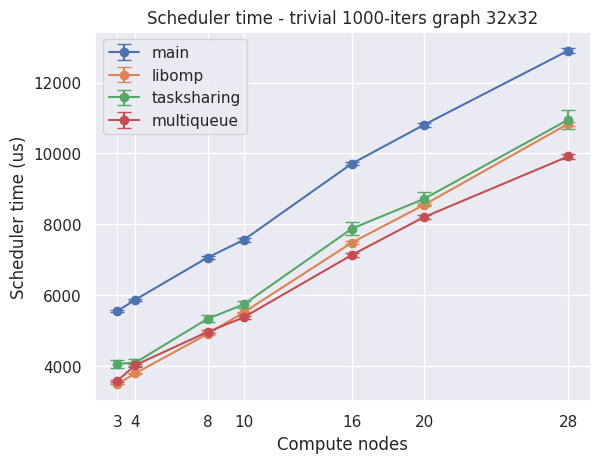

libomp speedup: 1.2278643091798733
tasksharing speedup: 1.1699142260378113
multiqueue speedup: 1.2489110175005713




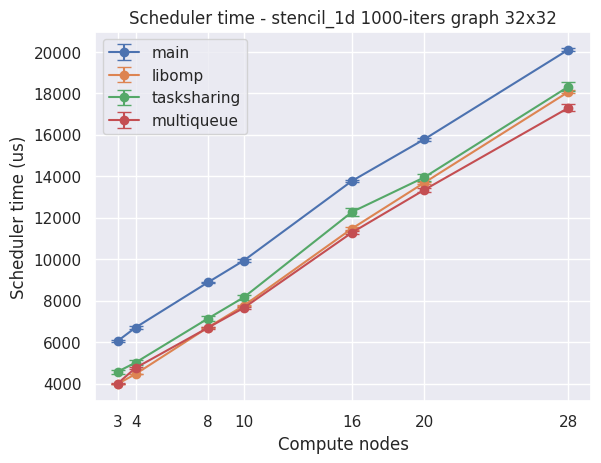

In [21]:
bench_names = df["name"].unique()

# get how many kinds of steps inputs we have

plt.rcParams.update({'font.size': 32})
steps_inputs = df["steps"].unique()
iter_inputs = df["iter"].unique()

for plot_type in ["time", "schedule"]:
    for iter_input in iter_inputs:
        for steps_input in steps_inputs:
            for dep_type in ["fft", "trivial", "stencil_1d"]:
                cry_for_help = {}
                for bench in bench_names:
                    if bench == "main_rr":
                        continue
                    if bench == "main_rr_blk":
                        continue

                    for plot_setup in metadata[bench]["plot_axis"]:
                        bench_df = df[df["name"] == bench].copy()

                        # print(bench_df)
                        bench_df = bench_df.copy()
                        # print(bench_df.head())

                        # filter by dep_type
                        bench_df = bench_df[bench_df["type"] == dep_type]
                        # drop type columsn since filter
                        bench_df.drop(columns=["type"], inplace=True)

                        # filter by steps
                        bench_df = bench_df[bench_df["steps"] == steps_input]
                        # drop type columsn since filter
                        bench_df.drop(columns=["steps"], inplace=True)

                        # filter by steps
                        bench_df = bench_df[bench_df["iter"] == iter_input]
                        # drop type columsn since filter
                        bench_df.drop(columns=["iter"], inplace=True)

                        # y_ax = "schedule"
                        # y_ax = "time"
                        y_ax = plot_type
                        x_ax = plot_setup["x_axis"]
                        group_by = "nodes"
                        title = "schedule time vs nodes"
                        n_runs = metadata["runs"]


                        # bench_df["schedule"] = bench_df["output"].apply(get_numerical_schedule)
                        bench_df["schedule"] = bench_df["output"].apply(get_numerical_schedule)
                        n_runs = metadata["runs"]

                        # make sure Y axis is numeric
                        bench_df[y_ax] = pd.to_numeric(bench_df[y_ax])
                        columns_with_nan = bench_df.columns[bench_df.isna().any()].tolist()

                        # Drop columns with NaN
                        bench_df = bench_df.drop(columns=columns_with_nan)
                        bench_df = bench_df.loc[:, ~bench_df.columns.duplicated()]

                        # Group by and calculate mean and bootstrap error
                        group_by = group_by.split(",")
                        grouped = (
                            bench_df.groupby(group_by)[y_ax]
                            .agg(["mean", calculate_bootstrap_error])
                            .reset_index()
                        )

                        # rprint(grouped)

                        plt.errorbar(
                            grouped[x_ax],
                            grouped["mean"],
                            yerr=grouped["calculate_bootstrap_error"],
                            fmt="o-",
                            capsize=5,
                            label=f"{bench}",
                        )
                        # save this line row
                        cry_for_help[bench] = grouped

                        # plt.xlabel(x_ax)
                        plt.xlabel("Compute nodes")
                        plt.xticks(grouped[x_ax])
                        # plt.ylabel(y_ax)
                        if y_ax == "time":
                            plt.ylabel("End-to-end time (s)")
                        elif y_ax == "schedule":
                            plt.ylabel("Scheduler time (us)")

                        plt.grid(True)
                        plt.legend()
                        if y_ax == "time":
                            plt.title(f"End-to-end time - {dep_type} {iter_input}-iters graph {steps_input}x{steps_input}")
                        elif y_ax == "schedule":
                            plt.title(f"Scheduler time - {dep_type} {iter_input}-iters graph {steps_input}x{steps_input}")

                # print(cry_for_help)
                for bench in cry_for_help.keys():
                    if bench != "main":
                        main_mean_sum = cry_for_help["main"]["mean"].sum()
                        # print bench speedup
                        curr_bench_sum = cry_for_help[bench]["mean"].sum()
                        print(f"{bench} speedup: {main_mean_sum/curr_bench_sum}")
                print("\n")
                plt.savefig(f"{output_folder}/{y_ax}_time_vs_nodes_{dep_type}_{iter_input}_{steps_input}.pdf", bbox_inches='tight')
                # plt.figure(figsize=(3.3, 2.4))
                # plt.tight_layout()
                plt.show()

                # plt.title(f"{title} | {n_runs} runs")

# plt.savefig(f"{output_folder}/scheduler_time_vs_nodes.pdf")
# plt.show()

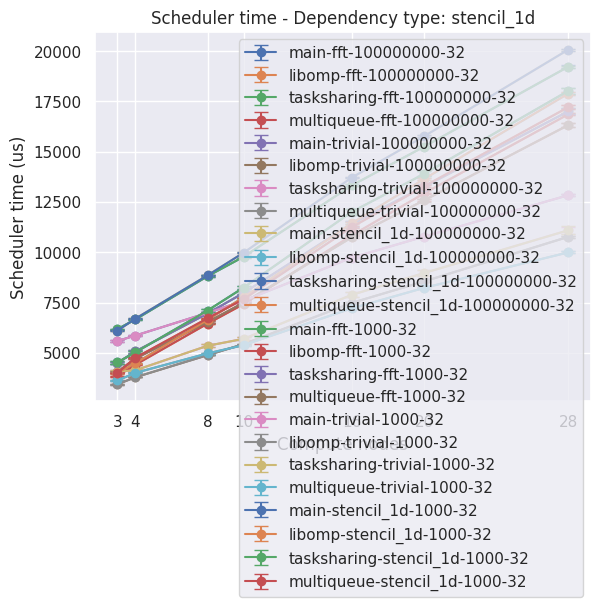

In [22]:
bench_names = df["name"].unique()

steps_inputs = df["steps"].unique()
iter_inputs = df["iter"].unique()

for iter_input in iter_inputs:
    for steps_input in steps_inputs:
        for dep_type in ["fft", "trivial", "stencil_1d"]:
            for bench in bench_names:
                if bench == "main_rr":
                    continue
                if bench == "main_rr_blk":
                    continue

                for plot_setup in metadata[bench]["plot_axis"]:
                    bench_df = df[df["name"] == bench].copy()

                    # print(bench_df)
                    bench_df = bench_df.copy()
                    # print(bench_df.head())
                    # filter by dep_type
                    bench_df = bench_df[bench_df["type"] == dep_type]
                    # drop type columsn since filter
                    bench_df.drop(columns=["type"], inplace=True)

                    y_ax = "schedule"
                    x_ax = plot_setup["x_axis"]
                    group_by = "nodes"
                    title = "schedule time vs nodes"
                    n_runs = metadata["runs"]


                    # bench_df["schedule"] = bench_df["output"].apply(get_numerical_schedule)
                    bench_df["schedule"] = bench_df["output"].apply(get_numerical_schedule)
                    n_runs = metadata["runs"]

                    # make sure Y axis is numeric
                    bench_df[y_ax] = pd.to_numeric(bench_df[y_ax])
                    columns_with_nan = bench_df.columns[bench_df.isna().any()].tolist()

                    # Drop columns with NaN
                    bench_df = bench_df.drop(columns=columns_with_nan)
                    bench_df = bench_df.loc[:, ~bench_df.columns.duplicated()]

                    # Group by and calculate mean and bootstrap error
                    group_by = group_by.split(",")
                    grouped = (
                        bench_df.groupby(group_by)[y_ax]
                        .agg(["mean", calculate_bootstrap_error])
                        .reset_index()
                    )

                    # rprint(grouped)
                    # plt.figure(figsize=(3.3, 2.4))

                    plt.errorbar(
                        grouped[x_ax],
                        grouped["mean"],
                        yerr=grouped["calculate_bootstrap_error"],
                        fmt="o-",
                        capsize=5,
                        label=f"{bench}-{dep_type}-{iter_input}-{steps_input}",
                    )

                    # plt.xlabel(x_ax)
                    plt.xlabel("Compute nodes")
                    plt.xticks(grouped[x_ax])
                    # plt.ylabel(y_ax)
                    plt.ylabel("Scheduler time (us)")
                    plt.grid(True)
                    plt.legend()
                    plt.title(f"Scheduler time - Dependency type: {dep_type}")

            # plt.show()

                    # plt.title(f"{title} | {n_runs} runs")

# plt.tight_layout()
# plt.savefig(f"{output_folder}/scheduler_time_vs_nodes.pdf")
plt.savefig(f"{output_folder}/scheduler_time_vs_nodes_AGGRGATE.pdf", bbox_inches='tight')
plt.show()